# Rider Types Analysis 

### San Francisco Data Import

In [3]:
# Data Set Up 

%matplotlib inline
import pandas as pd 
import numpy as np 
import datetime as dt 
import matplotlib.pyplot as plt

sf_data= pd.read_csv('sf_merged_data.csv', parse_dates=['starttime','stoptime'], low_memory= False)
del sf_data['Unnamed: 0']
sf_data.columns

Index(['tripduration', 'starttime', 'start station name', 'start station id',
       'stoptime', 'end station name', 'end station id', 'bikeid', 'usertype',
       'city', 'weather key', 'max temp', 'min temp', 'avg wind',
       'Pecipitation'],
      dtype='object')

### NYC Data Import

In [4]:
# Data Set Up 
%matplotlib
import pandas as pd 
import numpy as np 
import datetime as dt 
nyc_data= pd.read_csv('nyc_merged_data_shortened.csv', parse_dates=['starttime','stoptime'])
nyc_data.columns

Using matplotlib backend: Qt4Agg


Index(['Unnamed: 0', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'end station id',
       'end station name', 'bikeid', 'usertype', 'city', 'weather key',
       'Pecipitation', 'max temp', 'min temp', 'avg wind'],
      dtype='object')

In [5]:
del nyc_data['Unnamed: 0']
nyc_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'end station id', 'end station name', 'bikeid',
       'usertype', 'city', 'weather key', 'Pecipitation', 'max temp',
       'min temp', 'avg wind'],
      dtype='object')

### Count of Bike Trips by Distinct RiderType

In [102]:
# No missing Data NYC 

nyc_missing= nyc_data[(nyc_data['usertype']!= 'Customer' )& (nyc_data['usertype']!='Subscriber')]
nyc_missing

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,city,weather key,Pecipitation,max temp,min temp,avg wind


In [9]:
# No missing Data 

sf_missing= sf_data[(sf_data['usertype']!= 'Customer' )& (sf_data['usertype']!='Subscriber')]
sf_missing

,tripduration,starttime,start station name,start station id,stoptime,end station name,end station id,bikeid,usertype,city,weather key,max temp,min temp,avg wind,Pecipitation


In [38]:
sf_rider= sf_data.groupby(['usertype'], as_index= False)['tripduration','starttime'].count()

nyc_rider = nyc_data.groupby(['usertype'], as_index= False)['tripduration', 'starttime'].count()

#to have this as a dataframe and not a series 
del nyc_rider['starttime']
del sf_rider['starttime']

In [39]:

nyc_rider.columns= ['RiderType','Count']
nyc_rider.set_index(nyc_rider['RiderType'], inplace=True)
nyc_rider.index.names= [None]
del nyc_rider['RiderType']


In [30]:
b= nyc_rider['Count'].sum()
nyc_rider['percent']= round(nyc_rider['Count']/b * 100, 0)
nyc_rider.head()

,Count,percent
Customer,2246675,12.0
Subscriber,16516349,88.0


In [40]:

sf_rider.columns= ['RiderType','Count']
sf_rider.set_index(sf_rider['RiderType'], inplace=True)
sf_rider.index.names= [None]
sf_rider.columns= ['RiderType','Count']
sf_rider.head(5)
del sf_rider['RiderType']

In [41]:
a= sf_rider['Count'].sum()
sf_rider['percent']= round(sf_rider['Count']/a * 100, 0)
sf_rider.head(5)


,Count,percent
Customer,103213,15.0
Subscriber,566746,85.0


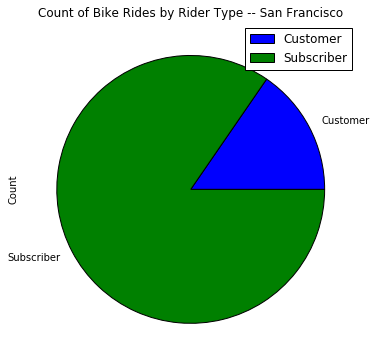

In [48]:
sf_rider.plot.pie (y ='Count',figsize=(6,6), legend= True,
                   title='Count of Bike Rides by Rider Type -- San Francisco' )

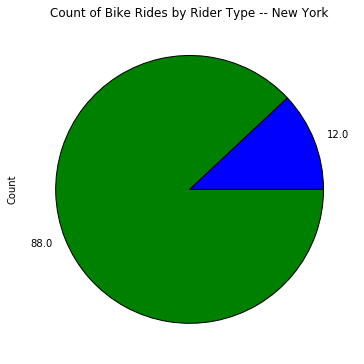

In [33]:
%matplotlib inline
nyc_rider.plot.pie (y = 'Count',figsize=(6,6),legend = False, labels = nyc_rider['percent'],
                    title='Count of Bike Rides by Rider Type -- New York' )

### Rider Type Count Time Series Comparison 

### San Fancisco 

In [30]:
sf_rider_trend= sf_data.copy()
#Create Date Column 
sf_rider_trend['Date']= sf_rider_trend["starttime"].dt.strftime('%Y%b')
sf_rider_trend['date_sort']=sf_rider_trend["starttime"].dt.strftime('%Y%m')

# Split by Customer and Subscriber to create Separate Series 
sf_customer_trend= sf_rider_trend[sf_rider_trend["usertype"]== 'Customer']
sf_subscriber_trend = sf_rider_trend[sf_rider_trend['usertype']=='Subscriber']

#Group each by Date 
sf_customer_group = sf_customer_trend.groupby(['date_sort','Date'],as_index=False)['tripduration', 'starttime'].count()
sf_subscriber_group= sf_subscriber_trend.groupby(['date_sort','Date'],as_index=False)['tripduration','starttime'].count()

#Merge
sf_allriders= pd.merge (sf_customer_group,sf_subscriber_group, how = 'left', on ='date_sort')
sf_allriders.head()

,date_sort,Date_x,tripduration_x,starttime_x,Date_y,tripduration_y,starttime_y
0,201308,2013Aug,1173,1173,2013Aug,929,929
1,201309,2013Sep,9476,9476,2013Sep,15767,15767
2,201310,2013Oct,6126,6126,2013Oct,22979,22979
3,201311,2013Nov,4489,4489,2013Nov,19730,19730
4,201312,2013Dec,3235,3235,2013Dec,16659,16659


In [31]:
del sf_allriders['starttime_x']
del sf_allriders['starttime_y']
del sf_allriders['Date_y']
sf_allriders.columns = ['Date','DateName','Customer','Subscriber']
sf_allriders.set_index('Date', inplace=True)
sf_allriders.index.names=[None]


In [32]:
sf_allriders['total']=sf_allriders['Customer']+ sf_allriders['Subscriber']
sf_allriders.head()

,DateName,Customer,Subscriber,total
201308,2013Aug,1173,929,2102
201309,2013Sep,9476,15767,25243
201310,2013Oct,6126,22979,29105
201311,2013Nov,4489,19730,24219
201312,2013Dec,3235,16659,19894


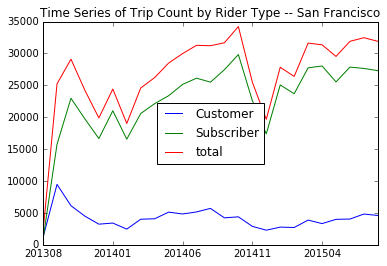

In [33]:

sf_allriders.plot.line(title= 'Time Series of Trip Count by Rider Type -- San Francisco')

In [28]:
sf_allriders['cust_perc']= round(sf_allriders['Customer']*100/sf_allriders['total'], 0)
sf_allriders['subs_perc']= round(sf_allriders['Subscriber']*100/sf_allriders['total'], 0)
sf_allriders.head()

,DateName,Customer,Subscriber,total,cust_perc,subs_perc
201308,2013Aug,1173,929,2102,56.0,44.0
201309,2013Sep,9476,15767,25243,38.0,62.0
201310,2013Oct,6126,22979,29105,21.0,79.0
201311,2013Nov,4489,19730,24219,19.0,81.0
201312,2013Dec,3235,16659,19894,16.0,84.0


In [19]:
del sf_allriders['Customer']
del sf_allriders['total']
del sf_allriders['Subscriber']

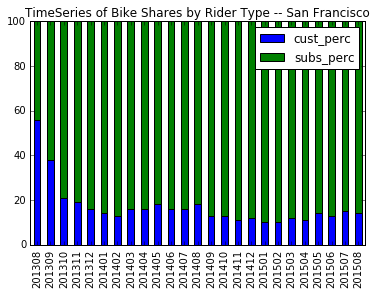

In [22]:
sf_allriders.plot.bar( stacked= True,title= 'TimeSeries of Bike Shares by Rider Type -- San Francisco')

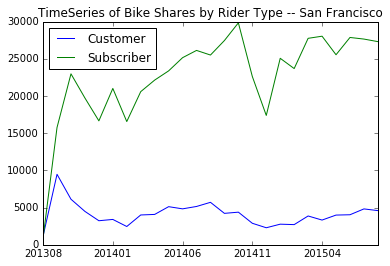

In [54]:
sf_allriders.plot.line(title= 'TimeSeries of Bike Shares by Rider Type -- San Francisco')

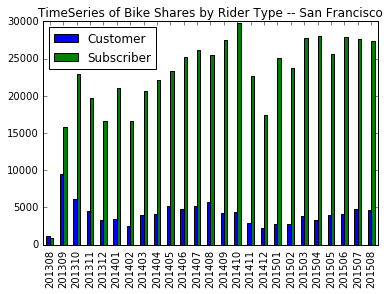

In [55]:
sf_allriders.plot.bar(title= 'TimeSeries of Bike Shares by Rider Type -- San Francisco')

### New York

In [34]:
nyc_rider_trend= nyc_data.copy()

In [35]:
#Note: Query takes some time to Complete: 

nyc_rider_trend= nyc_data.copy()
#Create Date Column 
nyc_rider_trend['Date']= nyc_rider_trend["starttime"].dt.strftime('%Y%b')
nyc_rider_trend['date_sort']=nyc_rider_trend["starttime"].dt.strftime('%Y%m')

# Split by Customer and Subscriber to create Separate Series 
nyc_customer_trend= nyc_rider_trend[nyc_rider_trend["usertype"]== 'Customer']
nyc_subscriber_trend = nyc_rider_trend[nyc_rider_trend['usertype']=='Subscriber']

#Group each by Date 
nyc_customer_group = nyc_customer_trend.groupby(['date_sort','Date'],as_index=False)['tripduration', 'starttime'].count()
nyc_subscriber_group= nyc_subscriber_trend.groupby(['date_sort','Date'],as_index=False)['tripduration','starttime'].count()

#Merge
nyc_allriders= pd.merge (nyc_customer_group,nyc_subscriber_group, how = 'left', on ='date_sort')
nyc_allriders.head()


,date_sort,Date_x,tripduration_x,starttime_x,Date_y,tripduration_y,starttime_y
0,201307,2013Jul,174915,174915,2013Jul,668501,668501
1,201308,2013Aug,186056,186056,2013Aug,815902,815902
2,201309,2013Sep,145169,145169,2013Sep,889190,889190
3,201310,2013Oct,97446,97446,2013Oct,940266,940266
4,201311,2013Nov,43973,43973,2013Nov,631801,631801


In [36]:
del nyc_allriders['starttime_x']
del nyc_allriders['starttime_y']
del nyc_allriders['Date_y']
nyc_allriders.columns = ['Date','DateName','Customer','Subscriber']
nyc_allriders.set_index('Date', inplace=True)
nyc_allriders.index.names=[None]

In [37]:
nyc_allriders['total']=nyc_allriders['Customer']+ nyc_allriders['Subscriber']
nyc_allriders.head()

,DateName,Customer,Subscriber,total
201307,2013Jul,174915,668501,843416
201308,2013Aug,186056,815902,1001958
201309,2013Sep,145169,889190,1034359
201310,2013Oct,97446,940266,1037712
201311,2013Nov,43973,631801,675774


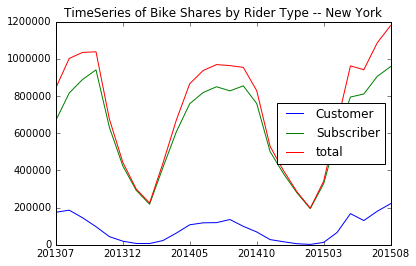

In [38]:
nyc_allriders.plot.line( title= 'TimeSeries of Bike Shares by Rider Type -- New York')

In [39]:
nyc_allriders['cust_perc']= round(nyc_allriders['Customer']*100/nyc_allriders['total'], 0)
nyc_allriders['subs_perc']= round(nyc_allriders['Subscriber']*100/nyc_allriders['total'], 0)
nyc_allriders.head()

,DateName,Customer,Subscriber,total,cust_perc,subs_perc
201307,2013Jul,174915,668501,843416,21.0,79.0
201308,2013Aug,186056,815902,1001958,19.0,81.0
201309,2013Sep,145169,889190,1034359,14.0,86.0
201310,2013Oct,97446,940266,1037712,9.0,91.0
201311,2013Nov,43973,631801,675774,7.0,93.0


In [43]:
del nyc_allriders['Customer']
del nyc_allriders['total']
del nyc_allriders['Subscriber']


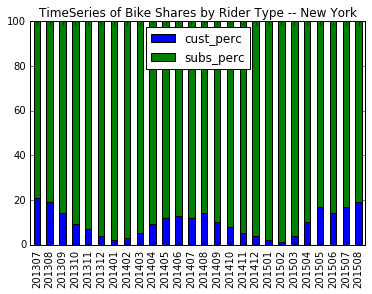

In [44]:
nyc_allriders.plot.bar( stacked= True,title= 'TimeSeries of Bike Shares by Rider Type -- New York')